In [1]:
# 3.1 지도학습 

import numpy as np # 계산 
import matplotlib.pyplot as plt # 그림(차트, 플롯)
import pandas as pd # 분석 
from sklearn import metrics # 모델 성능 평가 

# 데이터셋의 열에 이름 할당 
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'] 

# 데이터를 판다스 df에 저장, 경로는 수정 후 진행
dataset = pd.read_csv('data/iris.data', names = names)  

In [3]:
# 데이터 전처리, 훈련 및 검증 데이터셋으로 분리하기 

# 모든 행을 사용하지만 열은 뒤에서 하나 뺀 값을 가져온다. 
X = dataset.iloc[:, :-1].values
# 모든 행을 사용하지만 열은 앞에서 5번째값만 가져온다. 
y = dataset.iloc[:, 4].values 

from sklearn.model_selection import train_test_split 
# 훈련과 검증 데이터셋으로 분리, 검증에는 20% 할당 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

from sklearn.preprocessing import StandardScaler
s = StandardScaler() # 특성 스케일링. 평균이 0, 표준편차가 1이 되도록 변환 
X_train = s.transform(X_train) # 훈련 데이터를 스케일링 처리 
X_test = s.transform(X_test) # 검증 데이터를 스케일링 처리 

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [4]:
# 모델 생성 및 훈련 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 50) # K = 50인 K-최근접 이웃 모델 생성 
knn.fit(X_train, y_train) # 모델 훈련 

KNeighborsClassifier(n_neighbors=50)

In [5]:
# 모델 정확도 
from sklearn.metrics import accuracy_score 
y_pred = knn.predict(X_test) 
print("정확도: {}".format(accuracy_score(y_test, y_pred)))

정확도: 0.8666666666666667


In [6]:
# 최적의 K 찾기. k값에 따라 값이 달라진다. 
k = 10 
acc_array = np.zeros(k)
for k in np.arange(1, k+1, 1): # K는 1~10의 값을 취함 
    # for 문을 반복하면서 K값 변경 
    classifier = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train) 
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred) 
    acc_array[k-1] = acc 
    
max_acc = np.amax(acc_array)
acc_list = list(acc_array)
k = acc_list.index(max_acc)
print("정확도", max_acc, "으로 최적의 k는", k+1, "입니다.")

정확도 0.9666666666666667 으로 최적의 k는 5 입니다.


In [7]:
# 서포트 벡터 머신 
# 데이터(특히 텍스트) 분류에 많이 사용한다. 
# 분류를 위한 기준선을 정의하는 모델 

# 결정 경계 위치 설정하기. 데이터가 분류된 클래스에서 최대한 멀리 떨어져 있을 때 성능이 가장 좋다. 


In [13]:
from sklearn import svm 
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection 

import tensorflow as tf
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [14]:
# Iris 데이터로 훈련, 검증 데이터셋으로 분리 
iris = datasets.load_iris() # 데이터 가져오기 
# 사이킷런의 model_selection의 train_test_split 메서드를 활용해 훈련셋과 검증셋으로 분리 
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.6, random_state=42)

In [15]:
# SVM 모델 생성 및 훈련. 검증 데이터를 이요한 예측 수행 

# SVM 모델에 대한 정확도 
svm = svm.SVC(kernel = 'linear', C = 1.0, gamma = 0.5)
svm.fit(X_train, y_train) # 훈련 데이터를 사용하여 SVM 분류기를 훈련 
predictions = svm.predict(X_test) # 훈련된 모델을 사용하여 검증 데이터에서 예측 
score = metrics.accuracy_score(y_test, predictions) 
print('정확도: {0:f}'.format(score)) # 검증 데이터 (예측) 정확도 측정 

정확도: 0.988889


In [16]:
# 결정 트리 
# 이상치가 많은 값으로 구성된 데이터셋을 다룰 때 효과적이다. 
# 시각적으로 표현되기 때문에 매우 유용하다. 

In [17]:
# 지니 계수 
# 불순도를 측정하는 지표. 데이터의 통계적 분산 정도를 정량화해서 표현한 값 
# 지니 계수가 높을수록 데이터가 분산되어 있음을 의미 

In [19]:
# 결정 트리 예제 - 타이타닉 데이터셋 
import pandas as pd 
# 판다스를 이용해 데이터셋 파일을 로드해 저장 
df = pd.read_csv('data/titanic/train.csv', index_col = 'PassengerId') 
print(df.head()) 

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [20]:
# 분석에 필요한 데이터(칼럼)만 추출하여 전처리 
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Survived']] # 승객의 생존 여부를 예측하기 위함 
df['Sex'] = df['Sex'].map({'male':0, 'female':1}) # 'sex'값을 0, 1의 정수 값으로 변환 
df = df.dropna() # 결측치(빈값) 삭제 
X = df.drop('Survived', axis = 1)
y = df['Survived'] # 'Survived' 값을 예측 레이블로 사용 

In [21]:
# 훈련과 검증 데이터셋으로 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [23]:
# 결정 트리 모델 생성 
from sklearn import tree
model = tree.DecisionTreeClassifier() 

In [25]:
# 모델 훈련 
model.fit(X_train, y_train) # 모델 훈련 

DecisionTreeClassifier()

In [26]:
# 모델 예측 
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_predict) # 에측결과 출력 

0.8100558659217877

In [ ]:
# 혼동 행렬 
# 알고리즘 성능 평가에 사용 
# True Positive(TP) - 모델(분류기)이 ‘1’이라고 예측했는데 실제 값도 ‘1’인 경우
# True Negative(TN) - 모델(분류기)이 ‘0’이라고 예측했는데 실제 값도 ‘0’인 경우
# False Positive(FP) - 모델(분류기)이 ‘1’이라고 예측했는데 실제 값은 ‘0’인 경우
# False Negative(FN) - 모델(분류기)이 ‘0’이라고 예측했는데 실제 값은 ‘1’인 경우

In [27]:
# 혼동 행렬을 이용한 성능 측정 
from sklearn.metrics import confusion_matrix 
pd.DataFrame(
            confusion_matrix(y_test, y_predict), 
            columns = ['Predicted Not Survival', 'Predicted Survival'], 
            index = ['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,95,17
True Survival,17,50


In [28]:
# 로지스틱 회귀와 선형 회귀 
# 회귀란 변수가 두 개 주어졌을 때 한 변수에서 다른 변수를 예측하거나 두 변수의 관계를 규명하는데 사용하는 방법

# 독립 변수(예측 변수): 영향을 미칠 것으로 예상되는 변수 
# 종속 변수(기준 변수): 영향을 받을 것으로 예상되는 변수 
# 이때 두 변수 간 관계에서 독립 변수와 종속 변수의 설정은 논리적인 타당성이 있어야 한다. 

In [29]:
# 로지스틱 회귀 
# 주어진 데이터에 대한 분류하고자 할때 사용한다. 
# 주어진 데이터에 대한 확신이 없거나 결과에 대해 확신이 없을 때, 
# 향후 추가적으로 데이터를 수집하여 모델을 훈련시킬 수 있는 환경에서 유용하다. 
# 개별 관측치들이 어느 집단에 분류될 수 있는지 분석하고 이를 예측하는 모형을 개발하는데 사용되는 
# 통계 기법으로 일반적인 회귀분석과는 차이가 있다. 

In [2]:
# 라이브러리 호출 및 데이터 준비 
from sklearn.datasets import load_digits 
digits = load_digits() # 숫자 데이터셋은 사이킷런에서 제공 

print("Image Data Shape", digits.data.shape) # digits 데이터셋의 형태 
print("Label Data Shape", digits.target.shape) 

Image Data Shape (1797, 64)
Label Data Shape (1797,)


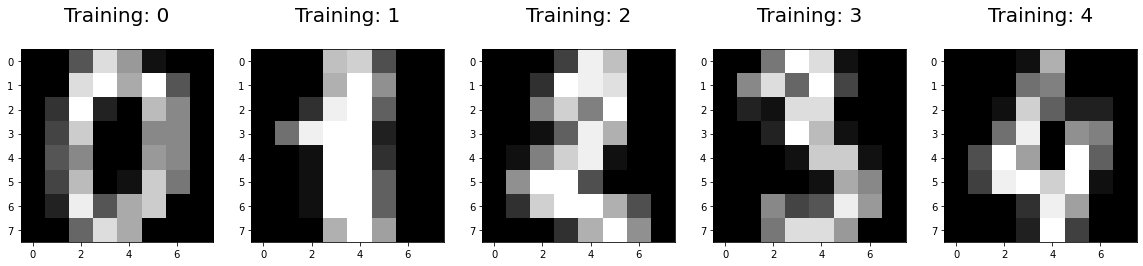

In [4]:
# 데이터셋의 시각화 
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    # 예시로 이미지 다섯개만 확인 
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [6]:
# 훈련과 검증 데이터셋 분리 및 로지스틱 회귀 모델 생성 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression() # 로지스틱 회귀 모델의 인스턴스 생성 
logisticRegr.fit(x_train, y_train) # 모델 훈련 

C:\Users\82109\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
# 일부 데이터를 사용한 모델 예측 
logisticRegr.predict(x_test[0].reshape(1,-1)) # 새로운 이미지(검증 데이터)에 대한 예측 결과를 넘파이 배열로 출력 
logisticRegr.predict(x_test[0:10]) # 이미지 열 개에 대한 예측을 한 번에 배열로 출력 

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [8]:
# 전체 데이터를 사용한 모델 예측 
predictions = logisticRegr.predict(x_test) # 전체 데이터셋에 대한 예측 
score = logisticRegr.score(x_test, y_test) # 스코어(score) 메서드를 사용한 성능 측정 
print(score)

0.9511111111111111


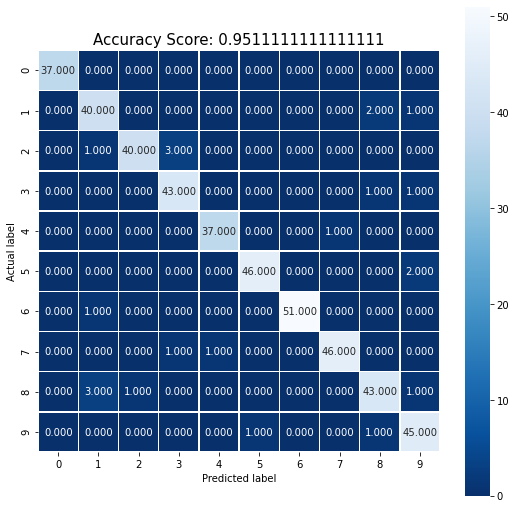

In [11]:
# 혼동 행렬 시각화 
import numpy as np 
import seaborn as sns 
from sklearn import metrics 

cm = metrics.confusion_matrix(y_test, predictions) # 혼동 행렬 
plt.figure(figsize = (9,9))
# heatmap으로 표현
sns.heatmap(cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label') # y축 
plt.xlabel('Predicted label') # x축 
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

In [12]:
# 선형회귀 - 라이브러리 호출 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# %matplotlib inline 

In [13]:
# weather.csv 파일 불러오기 
dataset = pd.read_csv('data/weather.csv')

In [14]:
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


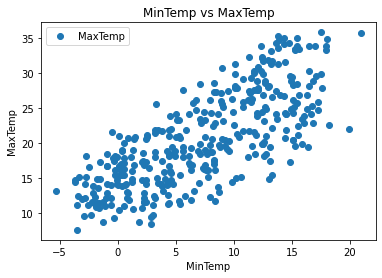

In [15]:
# 데이터 간 관계를 시각화로 표현 
dataset.plot(x = 'MinTemp', y = 'MaxTemp', style = 'o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [16]:
# 데이터를 독립변수와 종속변수로 분리하고 선형 회귀 모델 생성 
X = dataset['MinTemp'].values.reshape(-1, 1)
y = dataset['MaxTemp'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # 8:2

regressor = LinearRegression() # 선형 회귀 클래스를 가져옴 
regressor.fit(X_train, y_train) # fit() 메서드를 사용하여 모델 훈련

LinearRegression()

In [17]:
# 회귀 모델에 대한 예측 
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,22.8,28.778931
1,14.2,14.375101
2,28.8,25.284511
3,11.3,19.062738
4,21.2,16.591075
...,...,...
69,12.2,13.948952
70,33.2,27.500485
71,18.8,22.642388
72,18.2,19.659347


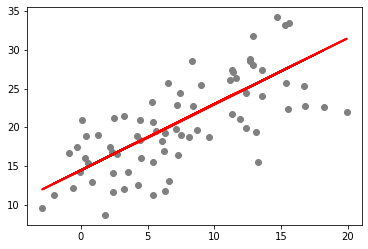

In [18]:
# 검증 데이터셋을 사용한 회귀선 표현 
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.show()

In [19]:
# 선형 회귀 모델 평가 
print('평균제곱법:', metrics.mean_squared_error(y_test, y_pred))
print('루트 평균제곱법:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균제곱법: 17.85737753456577
루트 평균제곱법: 4.225799040958499


In [20]:
# 비지도 학습 

In [21]:
# 주성분 분석(PCA) 
# 주어진 데이터를 간소화 
# 데이터의 특성(변수)이 너무 많을 경우 시각화해서 살펴보는 것에 불편하다.
# 이에 특성을 압축해서 데이터를 시각화하여 살펴보고 싶을 때 유용하다. 

In [22]:
# 라이브러리 호출 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import DBSCAN # 밀도 기반 군집 분석 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA

In [24]:
# 데이터 불러오기 
X = pd.read_csv('data/credit card.csv')
X = X.drop('CUST_ID', axis = 1) # 불러온 데이터에서 'CUST_ID' 열(칼럼)을 삭제 
X.fillna(method = 'ffill', inplace = True) # 결측치를 앞의 값으로 채워준다. 맨앞의 값은 NaN표시
print(X.head()) # 데이터셋 형태 확인 

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [26]:
# 데이터 전처리 및 데이터를 2차원으로 차원 축소 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) # 평균이 0, 표준편차가 1이 되도록 데이터 크기를 조정 

X_normalized = normalize(X_scaled) # 데이터가 가우스 분포를 따르도록 정규화 
X_normalized = pd.DataFrame(X_normalized) # 넘파이 배열을 데이터프레임으로 변환 

pca = PCA(n_components = 2) # 2차원으로 차원 축소 선언 
X_principal = pca.fit_transform(X_normalized) # 차원 축소 적용 
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679975
1 -0.519098  0.544831
2  0.330633  0.268878
3 -0.481656 -0.097611
4 -0.563511 -0.482505


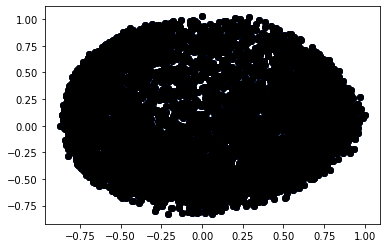

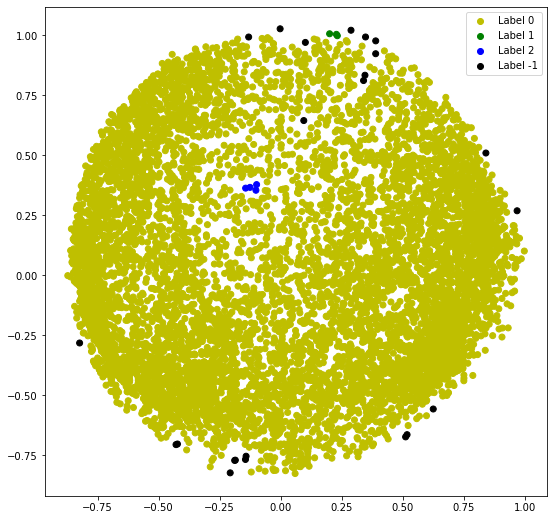

In [29]:
# DBSCAN 모델 생성 및 결과의 시각화 
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal) # 모델 생성 및 훈련 
labels = db_default.labels_ # 각 데이터 포인트에 할당된 모든 클러스터 레이블의 넘파이 배열을 labels에 저장

colours = {} # 출력 그래프의 색상을 위한 레이블 생성 
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# 각 데이터 포인트에 대한 색상 벡터 생성 
cvec = [colours[label] for label in labels] 

# 플롯(plot)의 범례(legend) 구성 
r = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'y')
g = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'g')
b = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'b')
k = plt.scatter(X_principal['P1'], X_principal['P2'], color = 'k') 

plt.figure(figsize = (9,9))
# 정의된 색상 벡터에 따라 X축에 P1, Y축에 P2 플로팅(plotting)
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 

# 범례 구축 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 

plt.show()

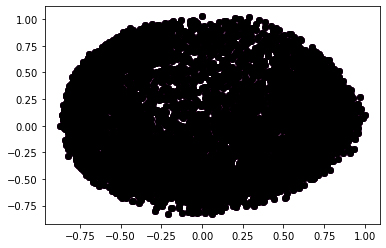

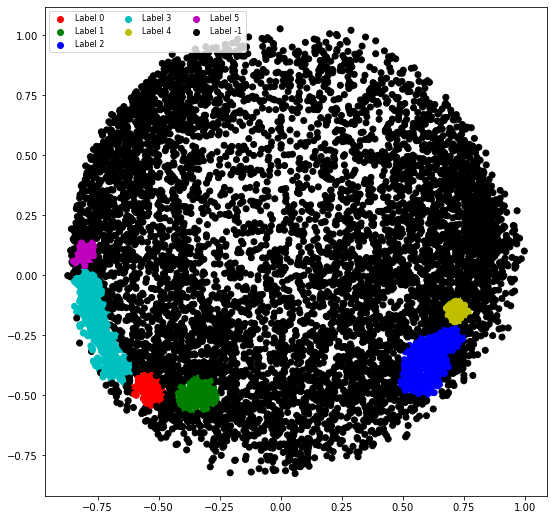

In [34]:
# 모델 튜닝 
# 하이퍼 파라미터(min_samples의 값 영향에 따라 클러스터 결과(성능)가 달라지므로,
# 최적의 성능을 내려면 하이퍼파라미터를 이용한 튜닝이 중요하다. 

db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal)
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker = 'o', color = colors1[0])
g = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker = 'o', color = colors1[1])
b = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker = 'o', color = colors1[2])
c = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker = 'o', color = colors1[3])
y = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker = 'o', color = colors1[4])
m = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker = 'o', color = colors1[5])
k = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker = 'o', color = colors1[6])

plt.figure(figsize = (9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((r, g, b, c, y, m, k), 
          ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
          scatterpoints = 1, 
          loc = 'upper left', 
          ncol = 3, 
          fontsize = 8)
plt.show()

In [35]:
# K-평균 군집화 
# 주어진 데이터에 대한 군집화 
# 주어진 데이터 셋을 이용하여 몇 개의 클러스터를 구성할지 사전에 알 수 있을 때 유용 

In [36]:
# 라이브러리 호출 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

In [37]:
# 상품에 대한 연 지출 데이터(sales data.csv) 호출 
data = pd.read_csv('data/sales data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [38]:
# 연속형 데이터와 명목형 데이터로 분류 
categorical_features = ['Channel', 'Region'] # 명목형 데이터 
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'] # 연속형 데이터 

for col in categorical_features: 
    # 명목형 데이터는 판다스의 get_dummies() 메서드를 사용하여 바이너리로 변환 
    dummies = pd.get_dummies(data[col], prefix = col) 
    data = pd.concat([data, dummies], axis = 1)
    data.drop(col, axis = 1, inplace = True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [39]:
# 데이터 전처리(스케일링 적용)
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

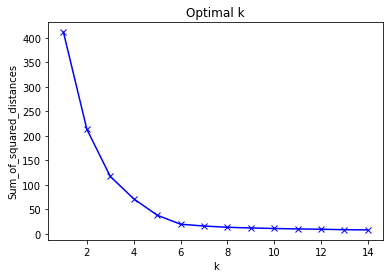

In [40]:
# 적당한 K 값 추출 
Sum_of_squared_distances = []
K = range(1, 15) # K에 1~15까지 적용해 보자 
for k in K: 
    km = KMeans(n_clusters = k) # 1~15의 K 값 적용 
    km = km.fit(data_transformed) # KMeans 모델 훈련 
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()

In [41]:
# 밀도 기반 군집 분석 
# 주어진 데이터에 대한 군집화 
# K-평균 군집화와는 다르게 사전에 클러스터의 숫자를 알지 못할 때 유용 
# 또한, 주어진 데이터에 이상치가 많이 포함되었을 때 사용하면 좋다. 

In [42]:
# 4. 딥러닝 